<a href="https://colab.research.google.com/github/Brokenx25/AR-AI_project/blob/cnn-cw/ADAM_alone_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADAM OPTIMIZER

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.3483 - loss: 1.7467 - val_accuracy: 0.5656 - val_loss: 1.2153
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.5720 - loss: 1.2085 - val_accuracy: 0.5834 - val_loss: 1.1984
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6324 - loss: 1.0407 - val_accuracy: 0.6541 - val_loss: 0.9823
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6717 - loss: 0.9372 - val_accuracy: 0.6715 - val_loss: 0.9393
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7078 - loss: 0.8370 - val_accuracy: 0.6783 - val_loss: 0.9354
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7320 - loss: 0.7684 - val_accuracy: 0.6945 - val_loss: 0.9004
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7469 - loss: 0.7231 - val_accuracy: 0.6968 - val_loss: 0.8874
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7616 -

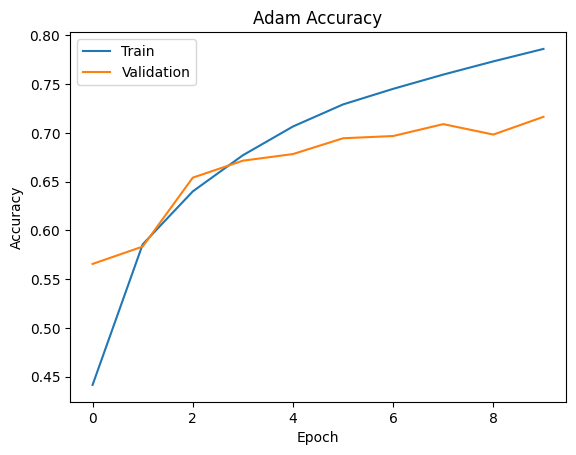

In [ ]:
# Adam
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


model.save("cnn_adam_model.h5")

# Plot graph
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Adam Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


🔍 Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,572 (478.80 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


📊 Model Parameters:
  Total parameters: 122570
  Trainable: 122570
  Non-trainable: 0


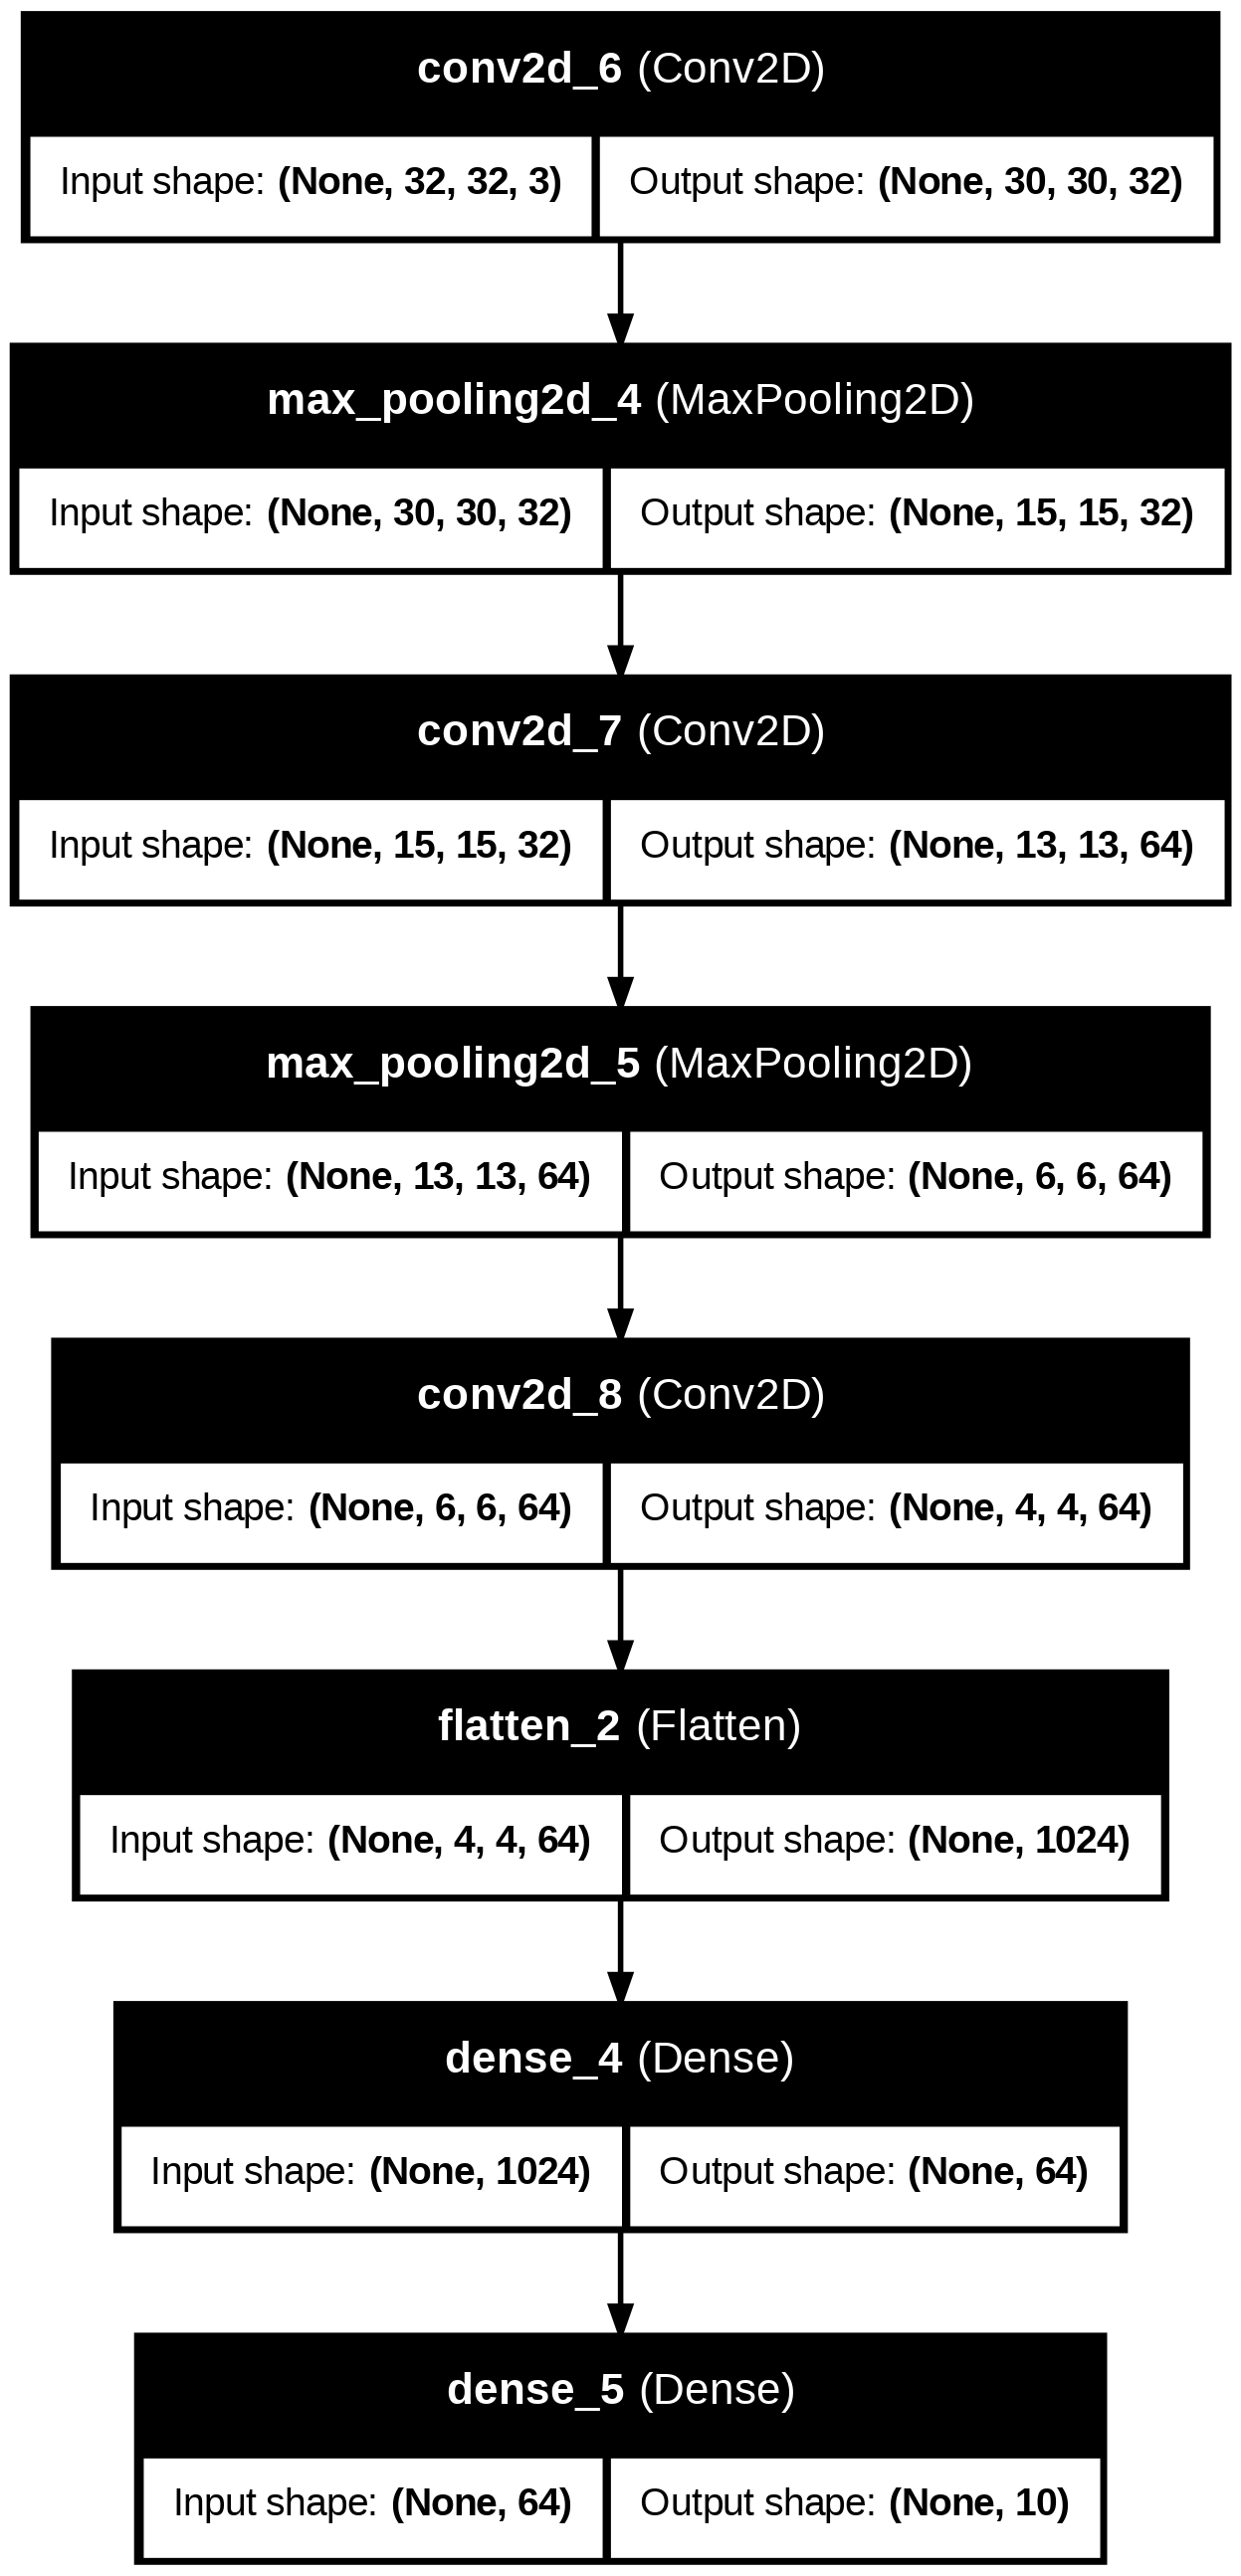

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model


model = load_model("cnn_adam_model.h5")


try:
    model.build(input_shape=(None, 32, 32, 3))  # Assuming CIFAR-10 input shape
except:
    pass


print("🔍 Model Summary:")
model.summary()



print("\n📊 Model Parameters:")
print(f"  Total parameters: {model.count_params()}")
print(f"  Trainable: {sum([layer.count_params() for layer in model.layers if layer.trainable])}")
print(f"  Non-trainable: {sum([layer.count_params() for layer in model.layers if not layer.trainable])}")


try:
    plot_model(model, show_shapes=True, show_layer_names=True, to_file="model_architecture.png")
    from IPython.display import Image
    display(Image(filename="model_architecture.png"))
except Exception as e:
    print(f"Diagram plot skipped: {e}")


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 4s - 12ms/step - accuracy: 0.7165 - loss: 0.8533
Test Accuracy: 71.65%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


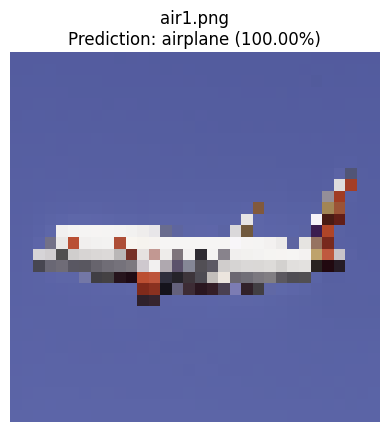

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


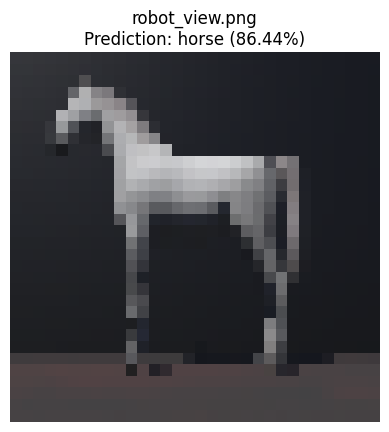

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


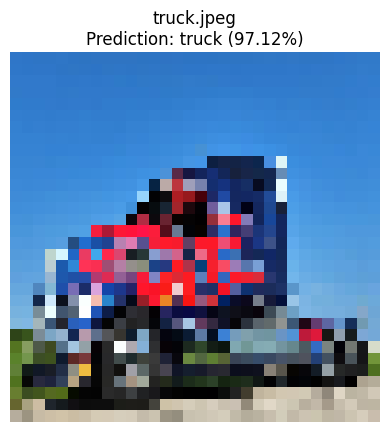

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load saved model
model = tf.keras.models.load_model("cnn_adam_model.h5")

uploaded_image_filenames = ["air1.png", "robot_view.png", "truck.jpeg"]

for fname in uploaded_image_filenames:
    img = cv2.imread(fname)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_norm = img / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    pred = model.predict(img_input)
    pred_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    plt.imshow(img)
    plt.title(f"{fname}\nPrediction: {pred_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()
